# Importing the necessary libraries

In [130]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno
from collections import  Counter

# Import the data to process it

We import the training data and the test data, we will only be working with the training data. Ultimately, we will make the predictions about the test data

In [131]:
# concatenating the training and the testing data so we have more values to work with and therefor we can better approximate the missing values
# the combined data differentiates the training set and the test set by encoding them with 1 and 0 respectively
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

# 1. Data analysis 
### 1.1 Visulisation and properties

In [132]:
# determine the null counts (missing data)
training. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


<AxesSubplot:>

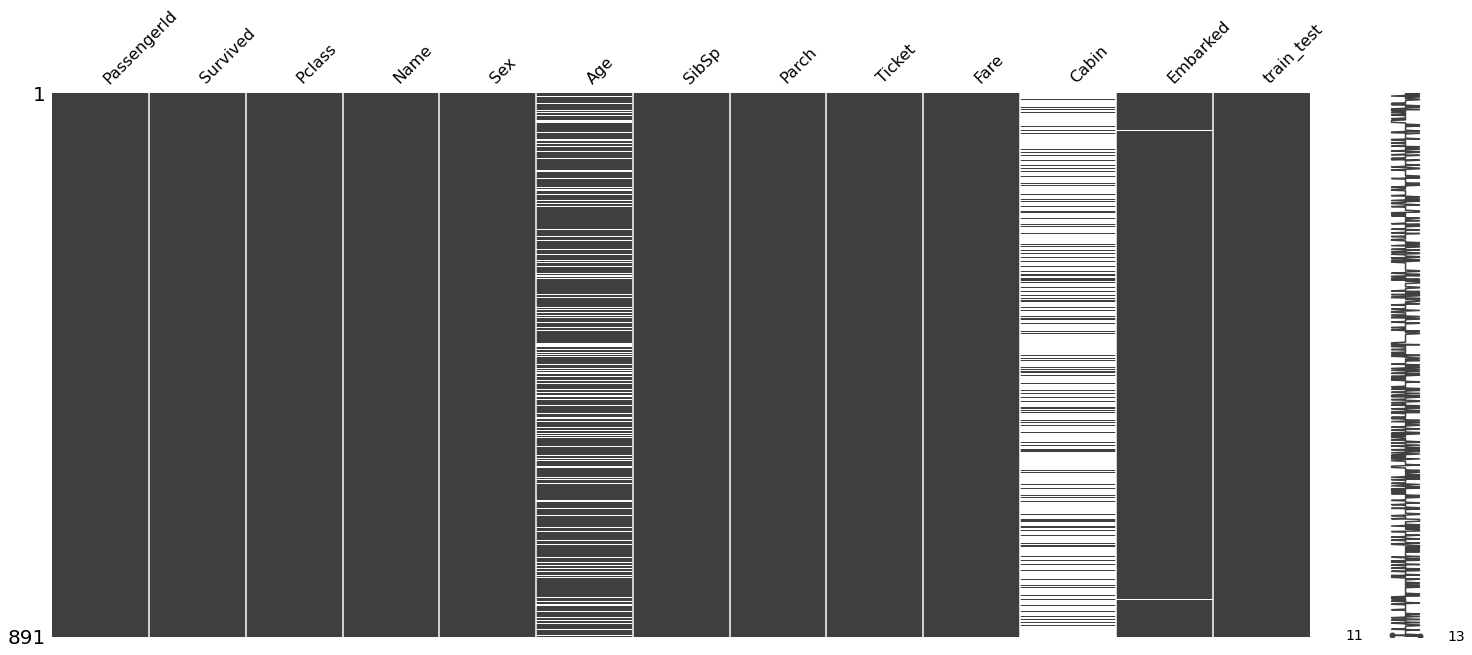

In [133]:
# Missing data in training set

missingno.matrix(training)

In [134]:
# determine the central dendencies of the data
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [135]:
# Seperate the numerical and the categorical data  so different visualisation techniques can be used

df_numeric = training[['Age','SibSp','Parch','Fare']]
df_catergorical = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

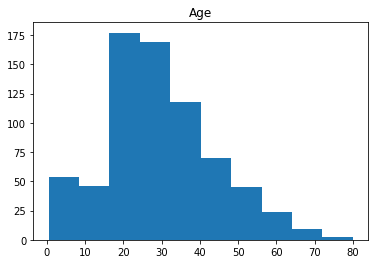

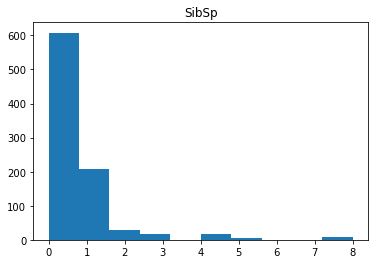

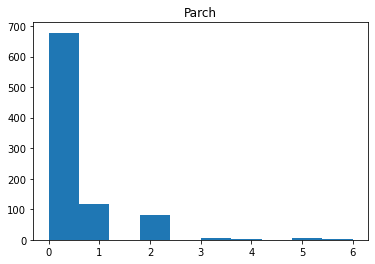

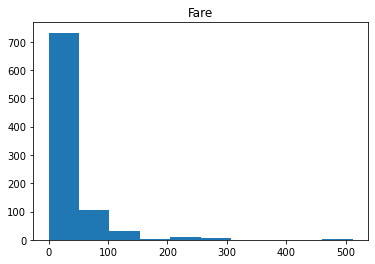

In [136]:
# for the numerical values look at their distributions
for i in df_numeric.columns:
    plt.hist(df_numeric[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

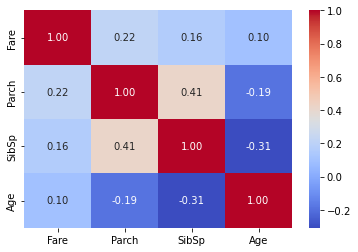

In [137]:
# determine the correlations of the numerical data using a heat map

sns.heatmap(df_numeric[['Fare','Parch','SibSp','Age']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

In [138]:
### DONNO WHAT THIS IS SHOWING US TRY UNDERSTAND
# To get a feel for the survival rates we will compare the survival rate for Age, Fare, Parch and SibSp

pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


c:\Users\shell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


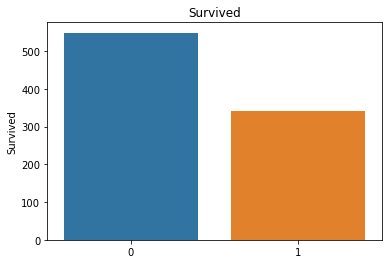

c:\Users\shell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


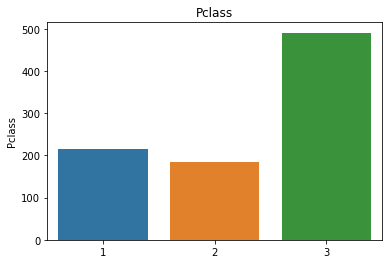

c:\Users\shell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


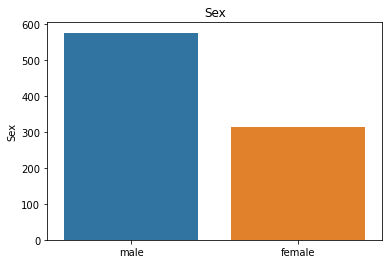

c:\Users\shell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


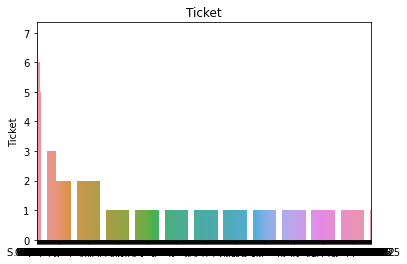

c:\Users\shell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


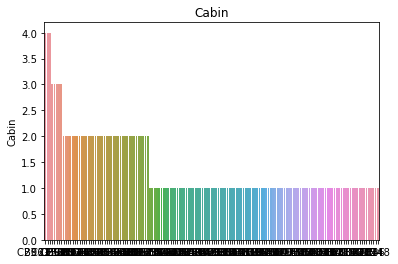

c:\Users\shell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


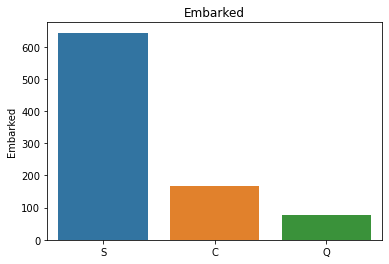

In [139]:
# make bar charts to understand the spread of the classes

for i in df_catergorical.columns:
    sns.barplot(df_catergorical[i].value_counts().index,df_catergorical[i].value_counts()).set_title(i);
    plt.show()
    

In [140]:
# To get a feel for the survival rates we will look at the survival rate for the categories in Pclass, Sex and Embarked

print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [141]:
# Value counts of the sex column

training['Sex'].value_counts(dropna = False)
print('-'*40)
# Comment: There are more male passengers than female passengers on titanic
# Mean of survival by sex
training[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

----------------------------------------


,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

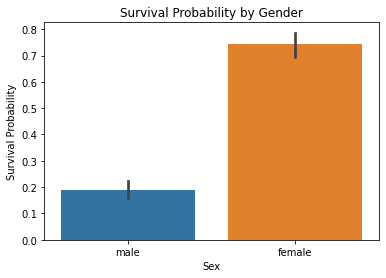

In [142]:
sns.barplot(x = 'Sex', y ='Survived', data = training)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

# Comment: Female passengers are more likely to survive

In [143]:
# Value counts of the Pclass column 

training['Pclass'].value_counts(dropna = False)
print('-'*40)

# Mean of survival by passenger class

training[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)


----------------------------------------


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

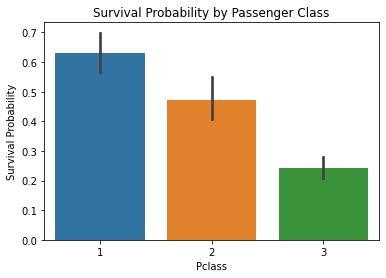

In [144]:
sns.barplot(x = 'Pclass', y ='Survived', data = training)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

# Comment: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

c:\Users\shell\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

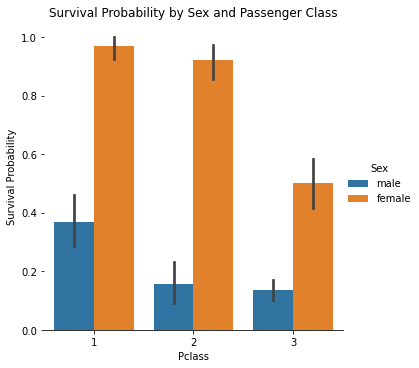

In [145]:
# Survival by gender and passenger class

g = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = training, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

In [146]:
# Value counts of the Embarked column 

training['Embarked'].value_counts(dropna = False)
# Comment: Two missing values in the Embarked column
print('-'*40)
# Mean of survival by point of embarkation

training[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)


----------------------------------------


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### 1.2 Feature engineering
The data for the cabin and tickes has many classes and is very messy therefore we will try clean it up by leveraging these classes to create new variables that aren't in the training set, Furthermore we will look at if the persons title is related to that persons survival

#### Cabin data

Determine if the cabin's letter had any impact on survival as well as determine if purchasing more thn one cabin had an impact on survivalDetermine if the cabin's letter had any impact on survival as well as determine if purchasing more thn one cabin had an impact on survival

In [147]:
# if the value is 0 it means that the cabin number is missing
# if the number is 1 it means that the passanger had one cain and if the number is 2 it means the passenger has 2 cabins ect
df_catergorical.Cabin
training['number_of_cabins'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
print(training['number_of_cabins'].value_counts())


pd.pivot_table(training, index = 'Survived', columns = 'number_of_cabins', values = 'Ticket' ,aggfunc ='count')

0    687
1    180
2     16
3      6
4      2
Name: number_of_cabins, dtype: int64


number_of_cabins,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [148]:
# Split up the cabins into cabin letters and cabin letter to see if there is link to survival
# n stands for null value meaining that there is a missing value or the cabin  does not have a letter
training['cabin_letter'] = training.Cabin.apply(lambda x: str(x)[0])
print(training.cabin_letter.value_counts())
pd.pivot_table(training,index='Survived',columns='cabin_letter', values = 'Name', aggfunc='count')


n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_letter, dtype: int64


cabin_letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


#### Ticket data
looking at the numerical values on the ticket and the letters on the tickets and comparing them to survival

In [149]:
# Look at numeric vs non numeric tickecks
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

# 0 represents numeric numbers
# 1 represents non numeric numbers

training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [150]:
# comparing the numeric and non numeric tickets to the survival rate
# 0 represents numeric numbers
# 1 represents non numeric numbers
pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [151]:
# looking at the different types of tickets basked on the ticket letters and compare them to the survival rateticket_letters
# 0 means that the ticket does not have a letter 
pd.pivot_table(training,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


#### Title data

In [152]:
training.Name.head()
# splits up the data into the persons title 
training['title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: title, dtype: int64

In [153]:
# grouping ages 
# bins = [0,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86]
# labels = ['0-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','71-75','76-80','81-85','86-x']
# # labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
# train_copy['Age'] = pd.cut(train_copy['Age'], bins=bins, labels=labels, right=False)
# train_copy.head()

#### Family Size

In [154]:
# feature engineering 
training['FamilySize']=training['Parch']+training['SibSp']+1
training=training.drop(['SibSp'],axis=1)
training=training.drop(['Parch'],axis=1)
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,train_test,number_of_cabins,cabin_letter,numeric_ticket,ticket_letters,title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0,n,0,a5,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1,C,0,pc,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1,0,n,0,stono2,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1,C,1,0,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1,0,n,1,0,Mr,1


In [155]:
# Value counts of the Family column 

training['FamilySize'].value_counts(dropna = False)
print('-'*40)
training[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

----------------------------------------


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


### 1.3. Data Preprocessing


#### Remove null value 
we need to decide what we arte goig to do here

In [156]:
#replace missing age  with 0 , potentially with mean 
training[['Age']]=training[['Age']].fillna(training[['Age']].mean())
training[['Age']]=training[['Age']].fillna(training[['Age']].mean())
training[['Embarked']]=training[['Embarked']].fillna('S')
# training[['Age']]=training[['Age']].fillna(training[['Age']].mean())
#training=training.drop(['Cabin'],axis=1)
#training=training.drop(['Cabin'],axis=1)
#median value replacement for age
# training[['Age']]=training[['Age']].fillna(training[['Age']].median())
# training[['Age']]=training[['Age']].fillna(training[['Age']].median())

(889,)

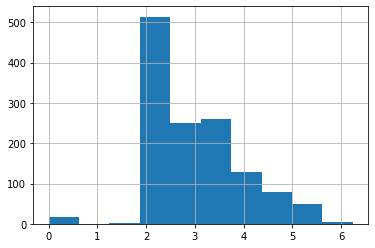

In [158]:
# we need to create all the categorical variables that we did above for the trainig set on all the data (the testing and training concatenated)
all_data['number_of_cabins'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_letter'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

# we miust fill in the null values for the missing values (NULL values)
#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(training.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

# drop the null values for the the embarked rows as there are only 2 instences of this in the training data and no instancences of this in the test data
all_data.dropna(subset=['Embarked'],inplace = True)

# log normal for fare 
## NOT SURE WHAT THIS ACHIEVES????
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# convert the Pclass values to a string so that we can encode it using .getDummies()
all_data.Pclass = all_data.Pclass.astype(str)
#encode all the dfata
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_letter','number_of_cabins','numeric_ticket','title','train_test']])

#split up the training and testing data again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)
y_train = all_data[all_data.train_test==1].Survived
y_train.shape

#### Remove outliers
We need to handle the misssing values in all the columns
Ensure the data only includes the relevent variables. 

In [157]:
# plagiarised

def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

#outliers_to_drop = detect_outliers(training, 2, ['Age', 'SibSp', 'Parch', 'Fare']) 
outliers_to_drop = detect_outliers(training, 1, ['Age', 'FamilySize', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 40 indices:  [7, 16, 119, 164, 183, 195, 268, 275, 297, 305, 366, 386, 438, 469, 587, 642, 644, 659, 745, 788, 824, 829, 879, 27, 88, 159, 180, 201, 311, 324, 341, 390, 435, 498, 742, 763, 792, 802, 846, 863]


#### Encoding

In [ ]:
# Standardize features by removing the mean and scaling to unit variance.
# The standard score of a sample x is calculated as:z = (x - u) / s
#where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False. [information is from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html]

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])


X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived
all_dummies_scaled